# 并行

本节验证一件事：让我们看看使用 `StateGraph` 创建的可并行节点是否真的在并行，让我们打印时间看看。

In [1]:
import time
from datetime import datetime
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.messages import HumanMessage
from langchain_core.runnables import RunnableConfig

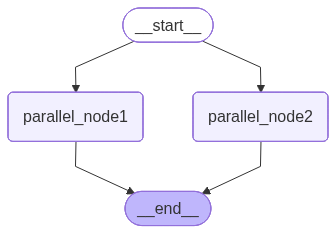

In [2]:
# 创建虚拟并行节点1
def parallel_node1(state: MessagesState, config: RunnableConfig):
    start_time = datetime.now()
    print(f"[parallel_node1] 进入函数时间: {start_time.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}")

    # 使用 sleep 模拟占用时间
    time.sleep(5)

    end_time = datetime.now()
    print(f"[parallel_node1] 退出函数时间: {end_time.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}")

    return {'messages': [HumanMessage(
        content=f'虚拟节点1运行了{round((end_time - start_time).total_seconds(), 3)}秒'
    )]}

# 创建虚拟并行节点2
def parallel_node2(state: MessagesState, config: RunnableConfig):
    start_time = datetime.now()
    print(f"[parallel_node2] 进入函数时间: {start_time.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}")

    # 使用 sleep 模拟占用时间
    time.sleep(10)

    end_time = datetime.now()
    print(f"[parallel_node2] 退出函数时间: {end_time.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]}")

    return {'messages': [HumanMessage(
        content=f'虚拟节点2运行了{round((end_time - start_time).total_seconds(), 3)}秒'
    )]}

# 创建图
builder = StateGraph(MessagesState)

# 添加节点
builder.add_node('parallel_node1', parallel_node1)
builder.add_node('parallel_node2', parallel_node2)

# 添加边
builder.add_edge(START, 'parallel_node1')
builder.add_edge(START, 'parallel_node2')
builder.add_edge('parallel_node1', END)
builder.add_edge('parallel_node2', END)

# 编译图
my_graph = builder.compile(name='my-graph')
my_graph

In [3]:
# 调用图
response = my_graph.invoke({'messages': [HumanMessage(content='执行 parallel_node1 和 parallel_node2')]})

for message in response['messages']:
    message.pretty_print()

[parallel_node1] 进入函数时间: 2025-11-09 19:43:06.557
[parallel_node2] 进入函数时间: 2025-11-09 19:43:06.557
[parallel_node1] 退出函数时间: 2025-11-09 19:43:11.562
[parallel_node2] 退出函数时间: 2025-11-09 19:43:16.562
================================ Human Message =================================

执行 parallel_node1 和 parallel_node2
================================ Human Message =================================

虚拟节点1运行了5.005秒
================================ Human Message =================================

虚拟节点2运行了10.005秒
